In [1]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

# write_raw_ptcl

### prepare lattice
- Phase advance is $\psi = 2\pi/3$
- So, each turn corresponds to 120 degree rotation
- 'write_raw_ptcl' for each turn

In [2]:
kx = 1.0
betx = 0.6
emitx = 1.0e-6
ke = 2.5e6
mass = 938.272045e6
g = ke/mass+1.0
bg = (g**2-1.0)**0.5
emitn = emitx*bg

In [3]:
const_focusing = impact.getElem('const_focusing')
const_focusing.length   = 2.0*np.pi/3.0
const_focusing.n_sckick = ceil(const_focusing.length*30)
const_focusing.kx2 = kx**2
const_focusing.ky2 = kx**2
const_focusing.kz2 = 0.0

loop = impact.getElem('loop')
loop.turns = 3

out1 = impact.getElem('write_raw_ptcl')
out1.file_id = - 11
out1.turn = 1
out1.sample_period = 1
out2 = impact.getElem('write_raw_ptcl')
out2.file_id = - 22
out2.turn = 2
out3 = impact.getElem('write_raw_ptcl')
out3.file_id = - 33
out3.turn = 3

lattice = [loop, const_focusing,out1,out2,out3]
# print(lattice)

In [4]:
beam = impact.getBeam()
beam.nCore_y = 2
beam.nCore_z = 2
beam.n_particles = 10000
beam.kinetic_energy = 100.0e6
beam.mass = mass
beam.frequency = 1.0
beam.current = 0.0
beam.distribution.distribution_type = 'KV'
beam.distribution.betx = betx
beam.distribution.bety = betx
beam.distribution.alfx = 0.0
beam.distribution.alfy = 0.0
beam.distribution.emitx = emitn
beam.distribution.emity = emitn
beam.distribution.emitz = 0.0

### check

In [5]:
impact.writeInputFile(beam,lattice,'test.in')
impact.run(beam)

0

In [6]:
pData1 = impact.readParticleData(-11,ke,mass,1.0)
pData2 = impact.readParticleData(-22,ke,mass,1.0)
pData3 = impact.readParticleData(-33,ke,mass,1.0)

(-0.005, 0.005)

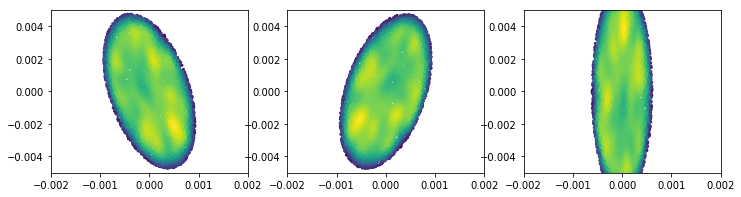

In [7]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
impact.plot.poincare(pData1[:,0],pData1[:,1],mksize=8)
plt.xlim(-0.002,0.002)
plt.ylim(-0.005,0.005)
plt.subplot(1,3,2)
impact.plot.poincare(pData2[:,0],pData2[:,1],mksize=8)
plt.xlim(-0.002,0.002)
plt.ylim(-0.005,0.005)
plt.subplot(1,3,3)
impact.plot.poincare(pData3[:,0],pData3[:,1],mksize=8)
plt.xlim(-0.002,0.002)
plt.ylim(-0.005,0.005)

In [8]:
print(pData1[0,:])

[-1.46200666e-04  1.60088837e-04 -7.97896119e-04  3.80132383e-03
  0.00000000e+00  0.00000000e+00  1.06578897e-09  0.00000000e+00
  1.00000000e+00]


# check binary_ptcl_input
- take the particle data from the 1st turn 

In [9]:
beam.distribution.distribution_type = 'ReadFile_binary'
beam.distribution.file_id = 11

In [10]:
impact.writeInputFile(beam,lattice,'test.in')
impact.run(beam)

0

In [11]:
pData1 = impact.readParticleData(-11,ke,mass,1.0)
pData2 = impact.readParticleData(-22,ke,mass,1.0)
pData3 = impact.readParticleData(-33,ke,mass,1.0)

(-0.005, 0.005)

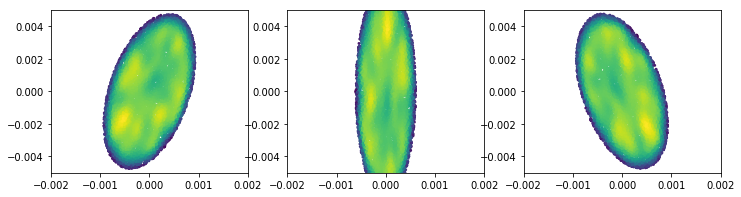

In [12]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
impact.plot.poincare(pData1[:,0],pData1[:,1],mksize=8)
plt.xlim(-0.002,0.002)
plt.ylim(-0.005,0.005)
plt.subplot(1,3,2)
impact.plot.poincare(pData2[:,0],pData2[:,1],mksize=8)
plt.xlim(-0.002,0.002)
plt.ylim(-0.005,0.005)
plt.subplot(1,3,3)
impact.plot.poincare(pData3[:,0],pData3[:,1],mksize=8)
plt.xlim(-0.002,0.002)
plt.ylim(-0.005,0.005)